<a href="https://colab.research.google.com/github/SurinSeong/FinalPJT/blob/main/annotation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.3 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

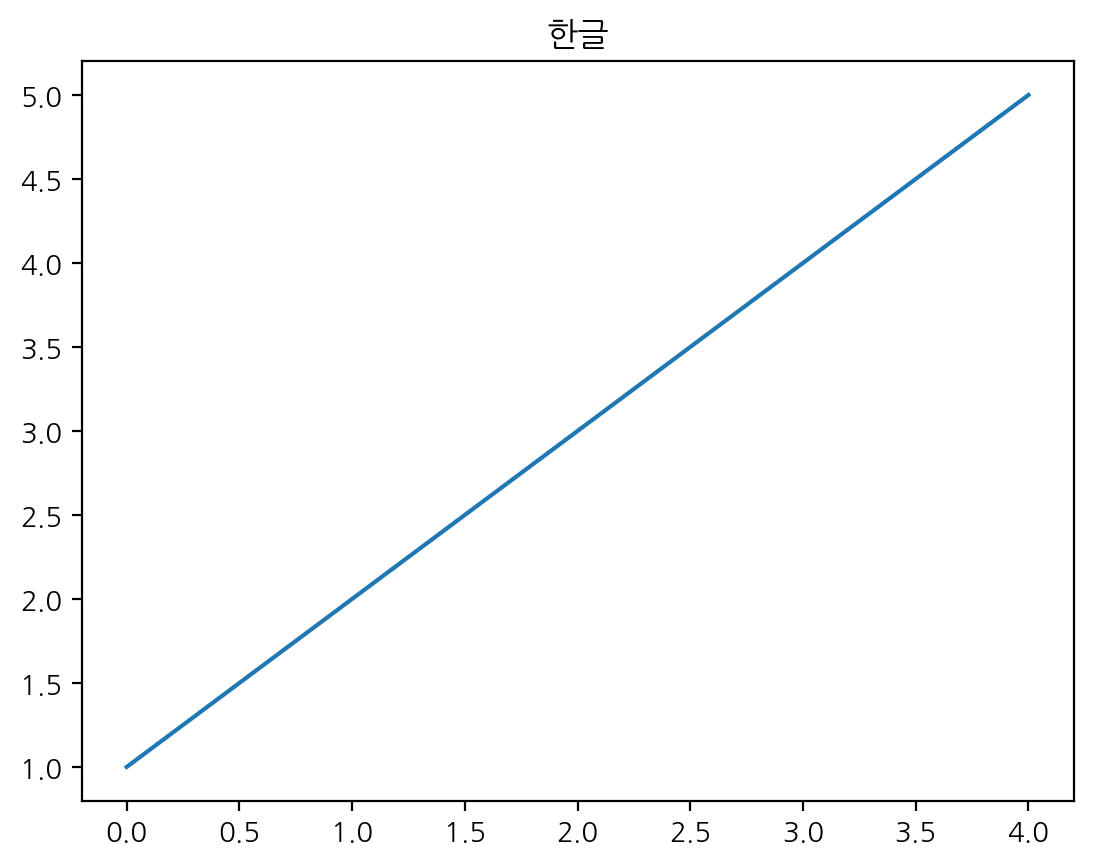

In [4]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 2, 3, 4, 5]).plot(title='한글')

In [5]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/finalPJT/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/'

In [9]:
# 위의 두 annotation 합치기
raw = pd.read_csv(folder_path+'annotation_data.csv', index_col=0).reset_index(drop=True)
annotation = raw.copy()
print(annotation.shape)
annotation.head(2)

(2895, 14)


,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
0,1,L,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
1,1,F,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0


In [10]:
annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2895 non-null   int64  
 1   location               2895 non-null   object 
 2   acne                   0 non-null      float64
 3   chin_sagging           2895 non-null   float64
 4   r_cheek_pore           2895 non-null   float64
 5   r_cheek_pigmentation   2895 non-null   float64
 6   forehead_wrinkle       2895 non-null   float64
 7   r_perocular_wrinkle    2895 non-null   float64
 8   l_cheek_pore           2895 non-null   float64
 9   glabellus_wrinkle      2895 non-null   float64
 10  lip_dryness            2895 non-null   float64
 11  forehead_pigmentation  2895 non-null   float64
 12  l_cheek_pigmentation   2895 non-null   float64
 13  l_perocular_wrinkle    2895 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 316.8+

In [11]:
annotation.describe()

,ID,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
count,2895.000000,0.0,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,553.368912,NaN,1.235233,2.041451,2.328497,2.245596,2.585492,2.030052,1.660104,2.021762,1.191710,2.252850,2.586528
std,317.319317,NaN,1.459048,0.845948,1.199026,1.498719,1.833855,0.847042,1.580761,0.724635,0.905829,1.180484,1.840577
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,NaN,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,559.000000,NaN,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,826.000000,NaN,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000
max,1100.000000,NaN,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000


In [88]:
annotation[:100]

,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
0,1,L,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
1,1,F,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
2,1,R,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
3,2,F,NaN,0.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0
4,2,R,NaN,0.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35,R,NaN,3.0,2.0,3.0,4.0,3.0,2.0,1.0,1.0,0.0,4.0,2.0
96,36,R,NaN,1.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,1.0,4.0,3.0
97,36,L,NaN,1.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,1.0,4.0,3.0
98,36,F,NaN,1.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,1.0,4.0,3.0


In [12]:
annotation.columns

Index(['ID', 'location', 'acne', 'chin_sagging', 'r_cheek_pore',
       'r_cheek_pigmentation', 'forehead_wrinkle', 'r_perocular_wrinkle',
       'l_cheek_pore', 'glabellus_wrinkle', 'lip_dryness',
       'forehead_pigmentation', 'l_cheek_pigmentation', 'l_perocular_wrinkle'],
      dtype='object')

### location 기준으로 분리

In [13]:
# Front, Left, Right 나눠서 확인하기
# dict에 넣어서 보관
location_dict = {}

grouped = annotation.groupby('location')
for location, group in grouped:
    location_dict[f'annotation_{location}'] = group

location_dict

{'annotation_F':         ID location  acne  chin_sagging  r_cheek_pore  r_cheek_pigmentation  \
 1        1        F   NaN           1.0           2.0                   3.0   
 3        2        F   NaN           0.0           2.0                   3.0   
 8        3        F   NaN           0.0           1.0                   0.0   
 9        4        F   NaN           1.0           4.0                   3.0   
 14       6        F   NaN           1.0           2.0                   3.0   
 ...    ...      ...   ...           ...           ...                   ...   
 2881  1096        F   NaN           0.0           2.0                   2.0   
 2884  1097        F   NaN           0.0           1.0                   1.0   
 2886  1098        F   NaN           0.0           2.0                   1.0   
 2890  1099        F   NaN           0.0           1.0                   1.0   
 2893  1100        F   NaN           1.0           2.0                   2.0   
 
       forehead_wrinkl

In [14]:
# front
annotation_F = location_dict['annotation_F'].copy()
annotation_R = location_dict['annotation_R'].copy()
annotation_L = location_dict['annotation_L'].copy()

### ID로 묶어서 F,L,R 평균 낸 값으로 저장한 DF

In [15]:
annotation_avg = \
annotation[['ID', 'acne', 'chin_sagging', 'r_cheek_pore',
       'r_cheek_pigmentation', 'forehead_wrinkle', 'r_perocular_wrinkle',
       'l_cheek_pore', 'glabellus_wrinkle', 'lip_dryness',
       'forehead_pigmentation', 'l_cheek_pigmentation', 'l_perocular_wrinkle']].groupby('ID').mean().reset_index()

In [16]:
annotation_avg.describe()

,ID,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
count,965.000000,0.0,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,553.368912,NaN,1.235233,2.041451,2.328497,2.245596,2.585492,2.030052,1.660104,2.021762,1.191710,2.252850,2.586528
std,317.429021,NaN,1.459552,0.846240,1.199441,1.499237,1.834489,0.847334,1.581307,0.724886,0.906142,1.180892,1.841214
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,NaN,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,559.000000,NaN,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,826.000000,NaN,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000
max,1100.000000,NaN,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000


## measurement_data

In [19]:
measurement_raw = pd.read_csv(folder_path+'measurement_data.csv', index_col=0)
measurement = measurement_raw.copy()
print(measurement.shape)
measurement.head(2)

(1072, 80)


,ID,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,1,53.0,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,15.760,95.142,41.774,98.502,70.769,46.387,52.115,147,608,629
1,2,75.0,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631


In [20]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1071
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1072 non-null   int64  
 1   수분_이마            1072 non-null   float64
 2   수분_오른쪽볼          1072 non-null   float64
 3   수분_왼쪽볼           1072 non-null   float64
 4   수분_턱             1072 non-null   float64
 5   탄력_턱_R0          1072 non-null   float64
 6   탄력_턱_R1          1072 non-null   float64
 7   탄력_턱_R2          1072 non-null   float64
 8   탄력_턱_R3          1072 non-null   float64
 9   탄력_턱_R4          1072 non-null   float64
 10  탄력_턱_R5          1072 non-null   float64
 11  탄력_턱_R6          1072 non-null   float64
 12  탄력_턱_R7          1072 non-null   float64
 13  탄력_턱_R8          1072 non-null   float64
 14  탄력_턱_R9          1072 non-null   float64
 15  탄력_턱_Q0          1072 non-null   float64
 16  탄력_턱_Q1          1072 non-null   float64
 17  탄력_턱_Q2          10

In [21]:
def extract_columns_by_keyword(df, keyword):
    # keyword가 포함된 컬럼명 필터링
    filtered_columns = [col for col in df.columns if keyword in col]

    # 필터링된 컬럼들로 새로운 데이터프레임 생성
    filtered_df = df[['ID'] + filtered_columns]

    return filtered_df

In [22]:
# 위의 함수 예시
## 눈가
extract_columns_by_keyword(measurement, '눈가')

,ID,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115
1,2,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907
2,3,14.234,17.888,106.800,46.069,112.22,83.785,52.243,59.979,15.411,19.352,111.210,51.799,116.000,89.042,60.206,55.790
3,4,17.478,21.618,133.210,54.118,139.96,93.392,73.288,66.673,17.115,21.353,116.290,54.002,126.210,93.858,61.262,64.950
4,6,15.936,20.052,137.100,51.184,142.55,91.870,68.735,73.816,16.222,20.146,116.920,52.665,122.920,89.886,65.894,57.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,1096,18.550,23.304,133.660,59.315,140.89,105.080,69.008,71.882,15.644,19.705,112.850,53.084,122.250,90.004,65.785,56.462
1068,1097,13.630,16.948,98.893,44.723,106.36,78.948,51.545,54.816,14.991,18.712,108.010,49.645,113.130,85.129,58.063,55.070
1069,1098,14.230,18.011,109.180,47.786,116.98,83.307,54.817,62.164,15.126,18.923,113.430,49.708,121.550,86.879,63.072,58.479
1070,1099,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229


**정밀 측정 데이터**
* 이마 - 수분, 탄력 (47-60)
* 볼 - 수분, 탄력 (19-46)
* 턱 - 수분, 탄력 (5-18)
* 눈가 - 주름 (60-75)
* 그 외 - spot, 모공 (-3:)


* acne : 존재하지 않음
* 턱 쳐짐 : 0-6 chin_sagging
* 모공 : 0-5 l_cheek_pore, r_cheek_pore
* 색소 침착 : 0-5
* 눈가 주름 : 0-6 r_perocular_wrinkle, l_perocular_wrinkle
* 이마 주름 : 0-6 forehead_wrinkle
* 입술건조도 : 0-4
* 미간 주름 : glabellus_wrinkle


### 눈가 주름 비교

In [23]:
# 주름_왼쪽눈가
l_perocular_wrinkle = annotation_avg[['ID', 'l_perocular_wrinkle']].merge(extract_columns_by_keyword(measurement, '왼쪽눈가'), on='ID')
print(l_perocular_wrinkle.shape)
l_perocular_wrinkle.head(2)

(965, 10)


,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,1,3.0,14.581,18.517,121.23,48.491,127.28,86.372,58.520,68.764
1,2,3.0,15.440,19.504,122.92,49.631,127.85,89.604,58.363,69.486


In [75]:
# 주름_오른쪽눈가
r_perocular_wrinkle = annotation_avg[['ID', 'r_perocular_wrinkle']].merge(extract_columns_by_keyword(measurement, '오른쪽눈가'), on='ID')
print(r_perocular_wrinkle.shape)
r_perocular_wrinkle.head(2)

(965, 10)


,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,2.0,12.56,15.760,95.142,41.774,98.502,70.769,46.387,52.115
1,2,3.0,14.39,18.147,116.790,47.082,122.940,84.142,54.029,68.907


In [24]:
l_perocular_wrinkle.describe()

,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,553.368912,2.586528,21.864304,27.464459,165.176699,69.641542,174.215862,122.857962,79.260788,94.955047
std,317.429021,1.841214,5.767411,7.143224,42.259080,17.391705,43.586194,28.917537,18.506173,26.951597
min,1.000000,0.000000,9.987700,12.643000,81.696000,32.710000,85.260000,60.666000,39.633000,41.921000
25%,281.000000,1.000000,17.600000,22.101000,136.350000,57.029000,143.750000,101.460000,66.329000,76.158000
50%,559.000000,2.000000,20.990000,26.504000,159.110000,67.273000,168.750000,119.530000,76.935000,91.545000
75%,826.000000,4.000000,25.030000,31.545000,188.390000,79.818000,198.110000,140.150000,90.216000,109.480000
max,1100.000000,6.000000,46.100000,58.076000,434.030000,157.100000,454.930000,241.670000,201.020000,253.920000


* 주름_왼쪽눈가_Ra 0-100
* 주름_왼쪽눈가_Rq 0-100
* 주름_왼쪽눈가_Rmax 0-300
* 주름_왼쪽눈가_R3z 0-100
* 주름_왼쪽눈가_Rt 0-350
* 주름_왼쪽눈가_Rz=Rtm 0-200
* 주름_왼쪽눈가_Rp 0-200
* 주름_왼쪽눈가_Rv 0-200
* 주름_오른쪽눈가_Ra 0-100
* 주름_오른쪽눈가_Rq 0-100
* 주름_오른쪽눈가_Rmax 0-300
* 주름_오른쪽눈가_R3z 0-100
* 주름_오른쪽눈가_Rt 0-350
* 주름_오른쪽눈가_Rz=Rtm 0-200
* 주름_오른쪽눈가_Rp 0-200
* 주름_오른쪽눈가_Rv 0-200

In [25]:
l_perocular_wrinkle.iloc[:, 1:].corr()

,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
l_perocular_wrinkle,1.000000,0.478211,0.473775,0.491758,0.441191,0.478161,0.432793,0.374814,0.515917
주름_왼쪽눈가_Ra,0.478211,1.000000,0.999270,0.968453,0.986712,0.968364,0.990496,0.907901,0.942630
주름_왼쪽눈가_Rq,0.473775,0.999270,1.000000,0.973409,0.986352,0.974218,0.993769,0.911895,0.949355
주름_왼쪽눈가_Rmax,0.491758,0.968453,0.973409,1.000000,0.952198,0.997470,0.972926,0.933757,0.971949
주름_왼쪽눈가_R3z,0.441191,0.986712,0.986352,0.952198,1.000000,0.953351,0.984037,0.904386,0.920764
주름_왼쪽눈가_Rt,0.478161,0.968364,0.974218,0.997470,0.953351,1.000000,0.976236,0.939632,0.972006
주름_왼쪽눈가_Rz=Rtm,0.432793,0.990496,0.993769,0.972926,0.984037,0.976236,1.000000,0.922602,0.945266
주름_왼쪽눈가_Rp,0.374814,0.907901,0.911895,0.933757,0.904386,0.939632,0.922602,1.000000,0.832929
주름_왼쪽눈가_Rv,0.515917,0.942630,0.949355,0.971949,0.920764,0.972006,0.945266,0.832929,1.000000


In [48]:
def show_histogram(df, col_name):
    # 데이터프레임을 길게 변환 (melt)
    df_melted = df.melt(id_vars=[col_name], var_name='Variable', value_name='Value')

    # FacetGrid를 사용한 히스토그램 그리기
    g = sns.FacetGrid(df_melted, col='Variable', col_wrap=3, height=4, aspect=2)
    g.map(sns.histplot, 'Value', kde=True)

    # 그래프 제목 조정
    g.set_titles("{col_name}")

    # 레이아웃 조정
    plt.tight_layout()

    # 그래프 출력
    plt.show()

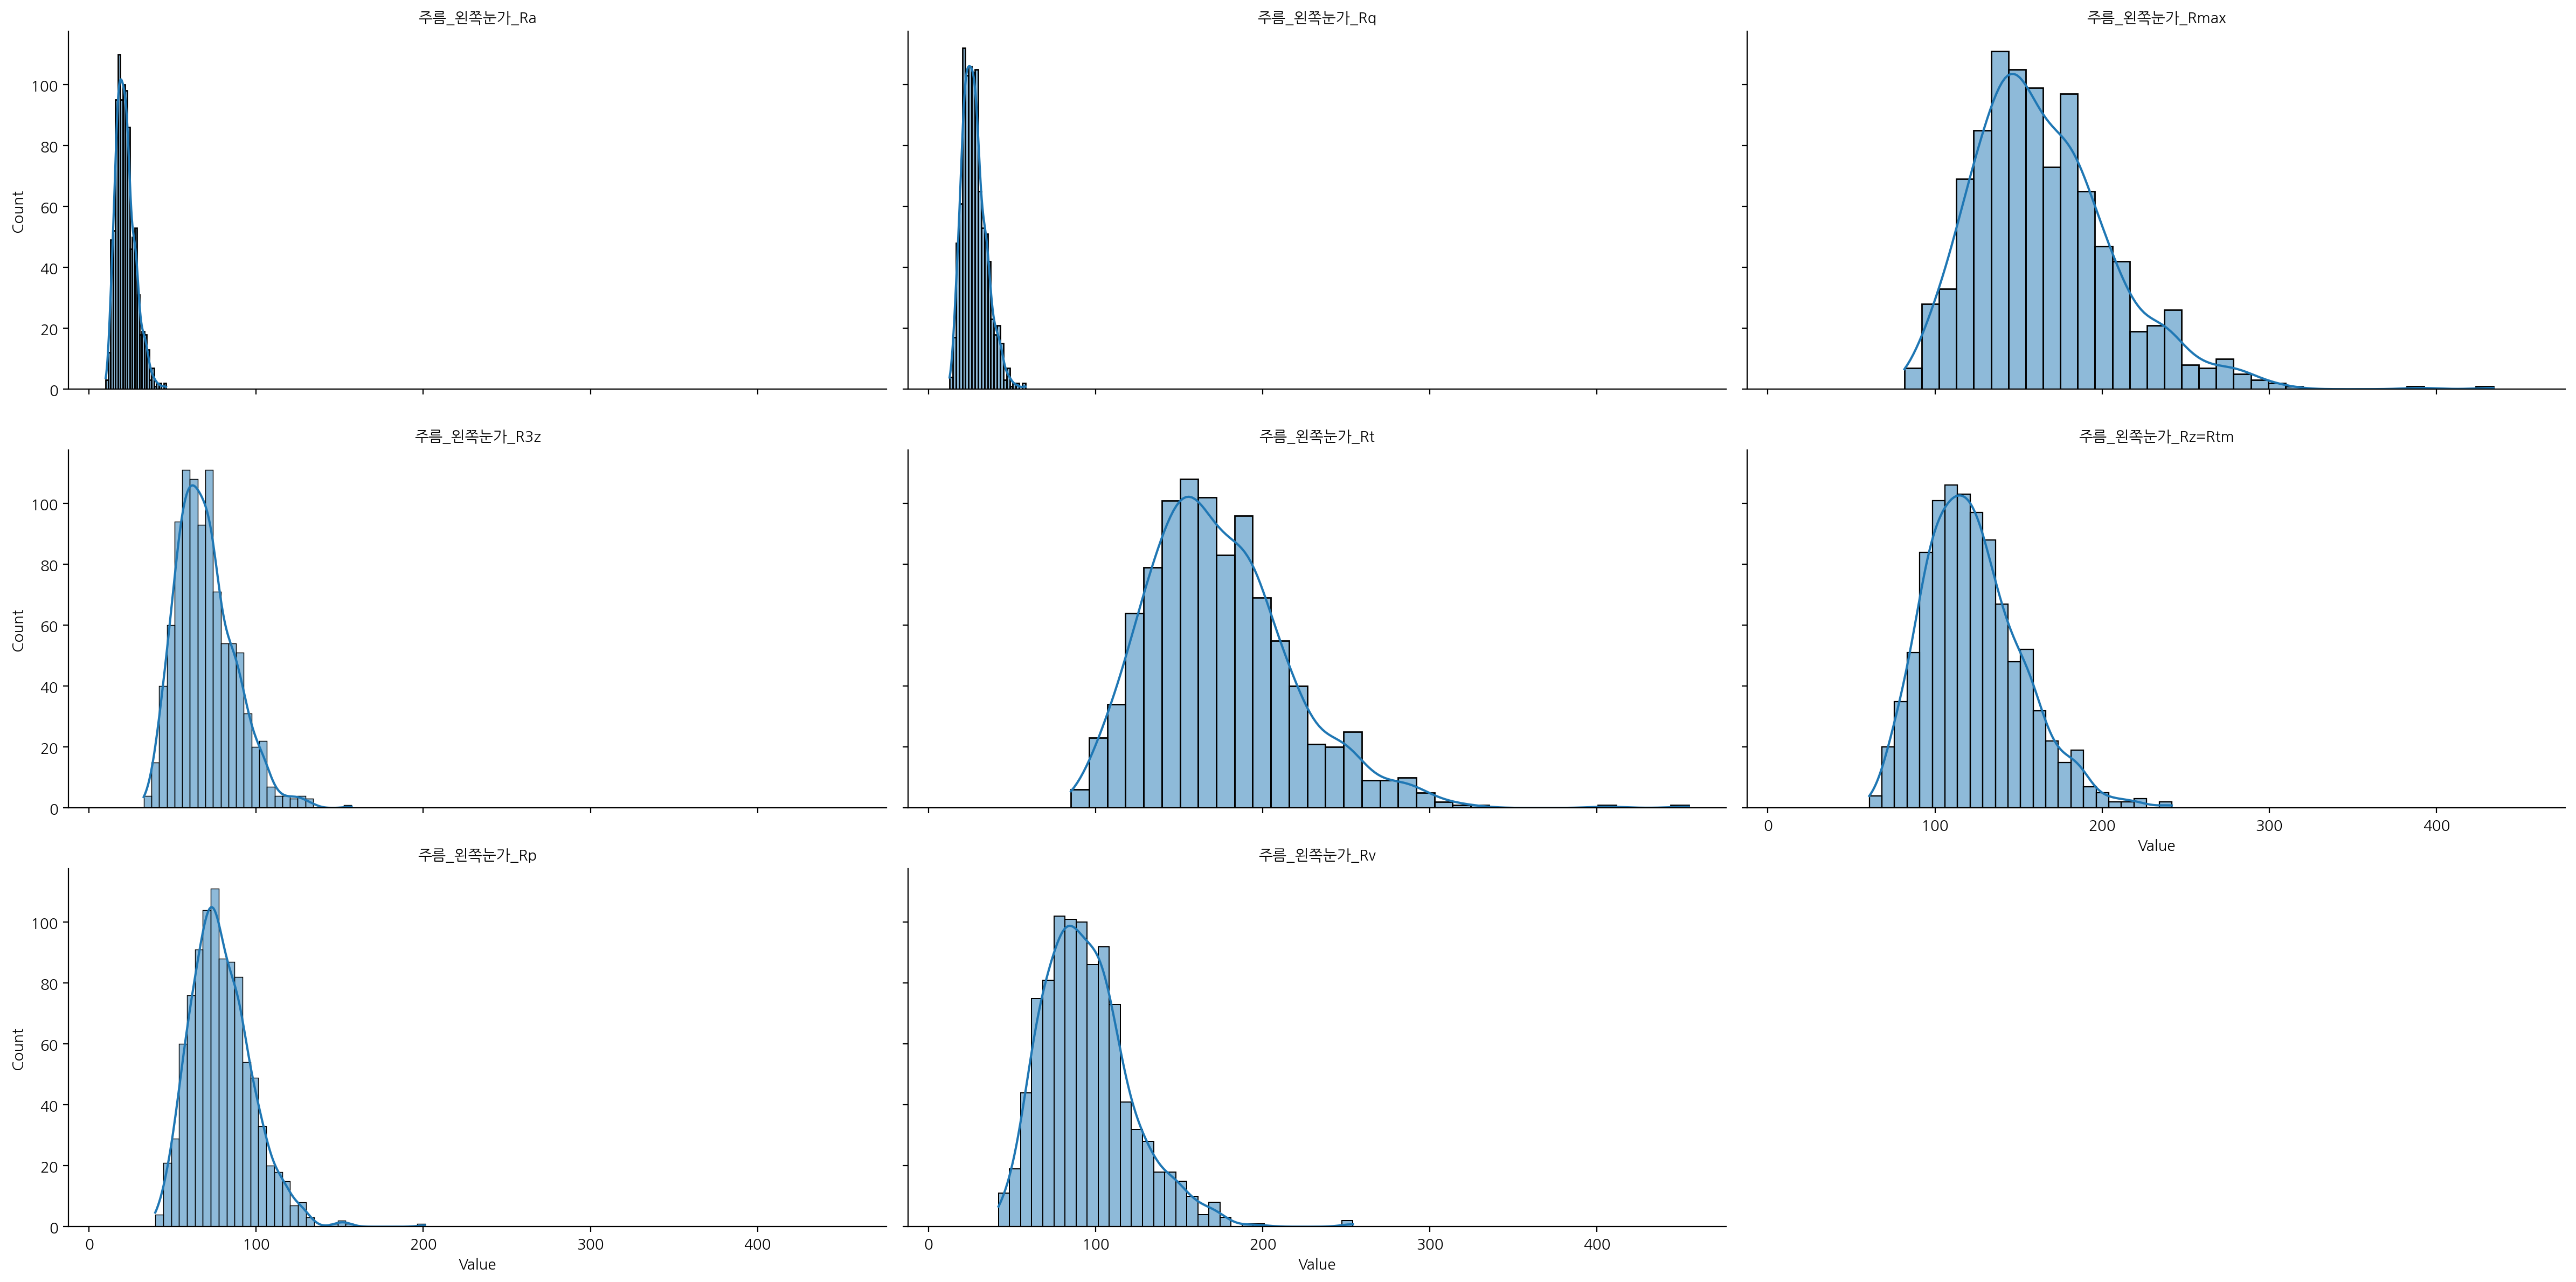

In [49]:
## 히스토그램 그리기
show_histogram(l_perocular_wrinkle.iloc[:, 1:], 'l_perocular_wrinkle')

In [33]:
l_perocular_wrinkle.iloc[:, 1:].groupby('l_perocular_wrinkle').mean()

,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
l_perocular_wrinkle,,,,,,,,
0.0,17.818368,22.424397,134.836912,57.900779,142.874721,102.947574,67.722926,75.151721
1.0,19.477790,24.558439,148.152788,62.896414,157.420296,112.337305,74.040262,83.380150
2.0,21.360469,26.876503,161.078580,68.505308,170.228951,121.236783,78.380559,91.847895
3.0,22.325035,28.007715,166.926007,71.377639,175.774729,124.727500,79.056833,96.718396
4.0,24.360652,30.488326,181.029438,77.039360,190.000787,134.123225,84.480315,105.520191
5.0,24.193384,30.262697,181.170889,75.501333,189.869697,132.047545,83.678232,106.191192
6.0,27.746921,34.744218,213.370693,85.854574,222.865743,150.395337,96.228515,126.637149


정규성 검정


In [86]:
# QQ-plot 확인해보자
# Q-Q 플롯
def qqplot(data):
    stats.probplot(data, dist="norm", plot=plt)
    plt.show()

In [ ]:
for col in l_perocular_wrinkle.iloc[:, 2:].columns:


In [53]:
from scipy.stats import shapiro
def shapiro_wilk(df):
    for col in df.columns:
        data = df[col]
        # Shapiro-Wilk Test
        stat, p_value = shapiro(data)
        print(f'{col} | Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')


In [54]:
shapiro_wilk(l_perocular_wrinkle.iloc[:, 2:])

주름_왼쪽눈가_Ra | Shapiro-Wilk Test: Statistics=0.9593667333965834, p-value=1.0053009111262047e-15
주름_왼쪽눈가_Rq | Shapiro-Wilk Test: Statistics=0.9611988658151971, p-value=2.5062026200944147e-15
주름_왼쪽눈가_Rmax | Shapiro-Wilk Test: Statistics=0.9503076345609252, p-value=1.6088592598164234e-17
주름_왼쪽눈가_R3z | Shapiro-Wilk Test: Statistics=0.9646088549874855, p-value=1.4906230482332138e-14
주름_왼쪽눈가_Rt | Shapiro-Wilk Test: Statistics=0.9546059806415218, p-value=1.063827709131978e-16
주름_왼쪽눈가_Rz=Rtm | Shapiro-Wilk Test: Statistics=0.9718123287110835, p-value=9.865143942240857e-13
주름_왼쪽눈가_Rp | Shapiro-Wilk Test: Statistics=0.9637796402621117, p-value=9.560787435789792e-15
주름_왼쪽눈가_Rv | Shapiro-Wilk Test: Statistics=0.9495442727748259, p-value=1.1645853095522237e-17


정규성 결론 : 정규성을 나타내지 않음.

등분산성

In [63]:
from scipy.stats import levene

def separate_group(df, group_name):
    group_list = []
    for group in df[group_name].unique():
        # 그룹별 데이터 분리
        globals()[f'group_{group}'] = df[df[group_name] == group][df.columns[1:]]
        group_list.append(globals()[f'group_{group}'])
    return group_list


In [65]:
group_list = separate_group(l_perocular_wrinkle.iloc[:, 1:], 'l_perocular_wrinkle')

In [68]:
len(group_list)

7

In [70]:
# Levene's Test
stat, p_value = levene(group_list[0], group_list[1], group_list[2], group_list[3], group_list[4], group_list[5], group_list[6])
print(f'Levene’s Test\nStatistics={stat}\np-value={p_value}')

Levene’s Test
Statistics=[10.34665392  9.77509318 10.62745738  7.83967766  9.08736118  7.66186016
  5.56583545 10.05519258]
p-value=[3.95541240e-11 1.79029139e-10 1.88354177e-11 2.94005976e-08
 1.09997313e-09 4.68978418e-08 1.09878641e-05 8.54292838e-11]


ANOVA

In [50]:
import scipy.stats as stats
def avona(df, group):
    # 각 컬럼에 대해 ANOVA 수행
    for column in df.columns:
        groups = [df[df[group] == g][column] for g in df[group].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"ANOVA for {column}: F-statistic = {f_stat}, P-value = {p_val}")

In [51]:
avona(l_perocular_wrinkle.iloc[:, 1:], 'l_perocular_wrinkle')

ANOVA for l_perocular_wrinkle: F-statistic = inf, P-value = 0.0
ANOVA for 주름_왼쪽눈가_Ra: F-statistic = 49.55641934734527, P-value = 3.8441182759321053e-53
ANOVA for 주름_왼쪽눈가_Rq: F-statistic = 48.56221004705798, P-value = 3.650332869516413e-52
ANOVA for 주름_왼쪽눈가_Rmax: F-statistic = 54.94464404354088, P-value = 2.3024559137713602e-58
ANOVA for 주름_왼쪽눈가_R3z: F-statistic = 40.86172952896222, P-value = 1.927931783800262e-44
ANOVA for 주름_왼쪽눈가_Rt: F-statistic = 51.318973376119175, P-value = 7.286654229965665e-55
ANOVA for 주름_왼쪽눈가_Rz=Rtm: F-statistic = 39.41830121851855, P-value = 5.797056545463754e-43
ANOVA for 주름_왼쪽눈가_Rp: F-statistic = 29.409479275099347, P-value = 1.9342454692121693e-32
ANOVA for 주름_왼쪽눈가_Rv: F-statistic = 61.762650678847656, P-value = 8.511825023612631e-65


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


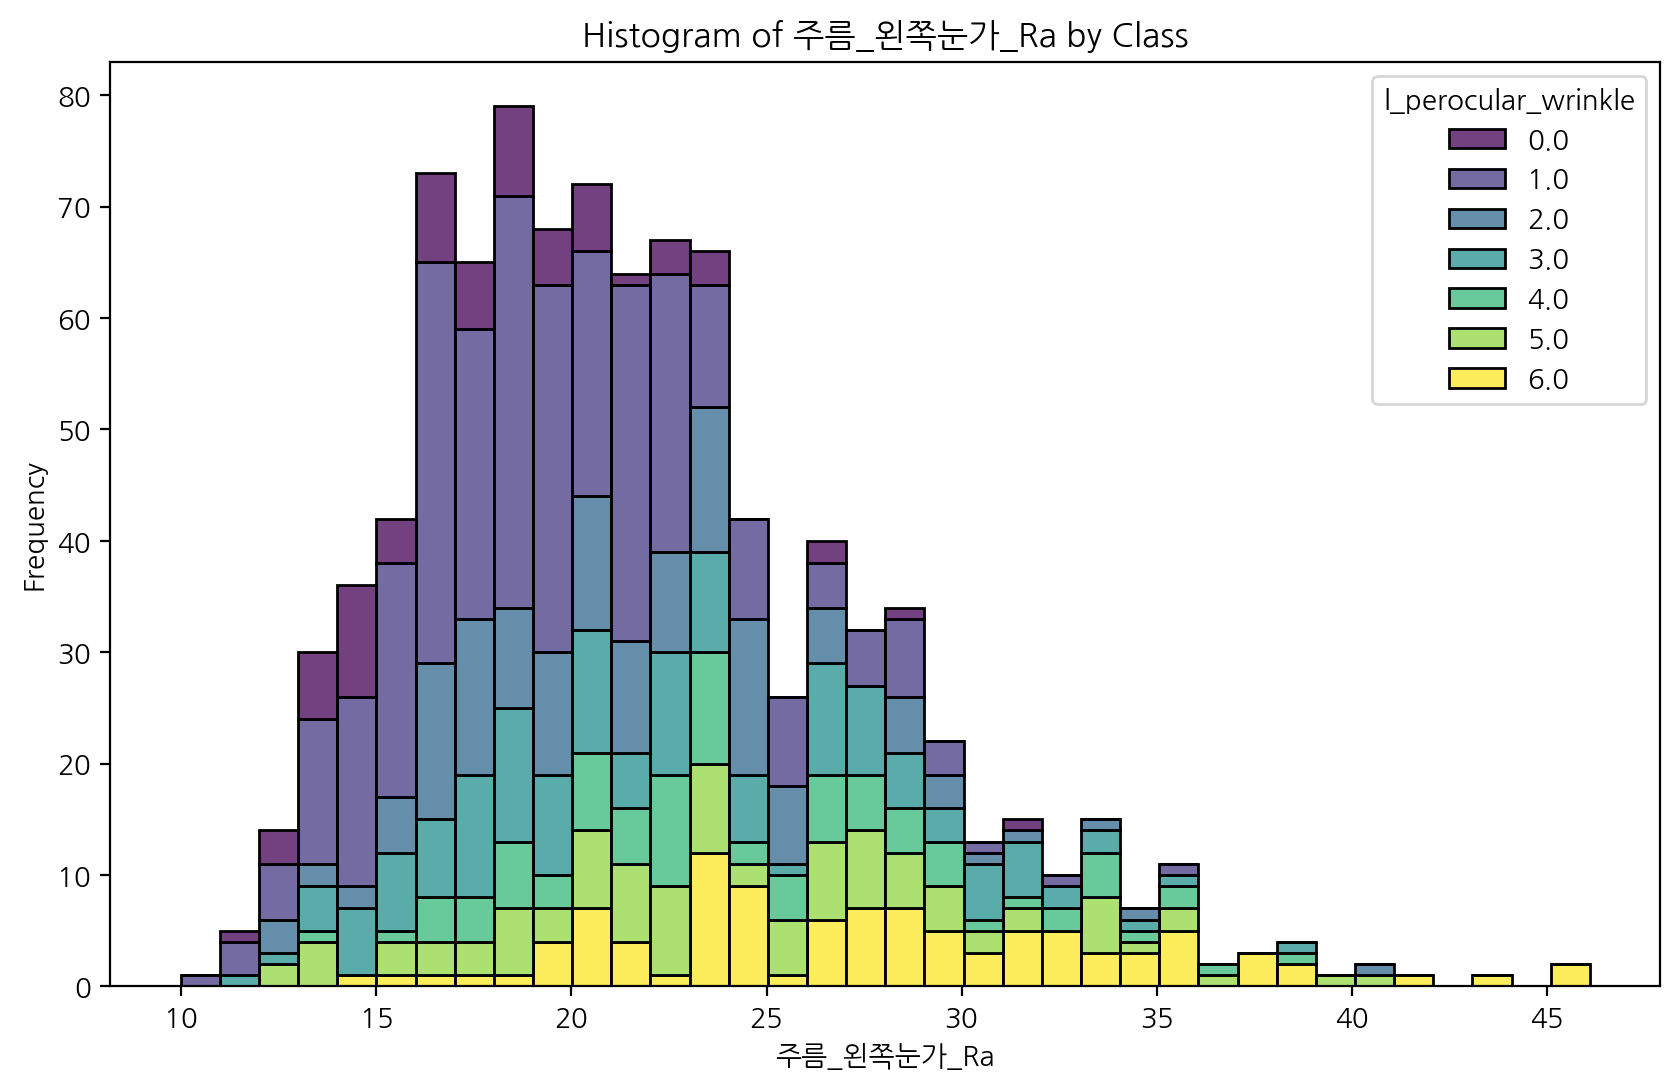

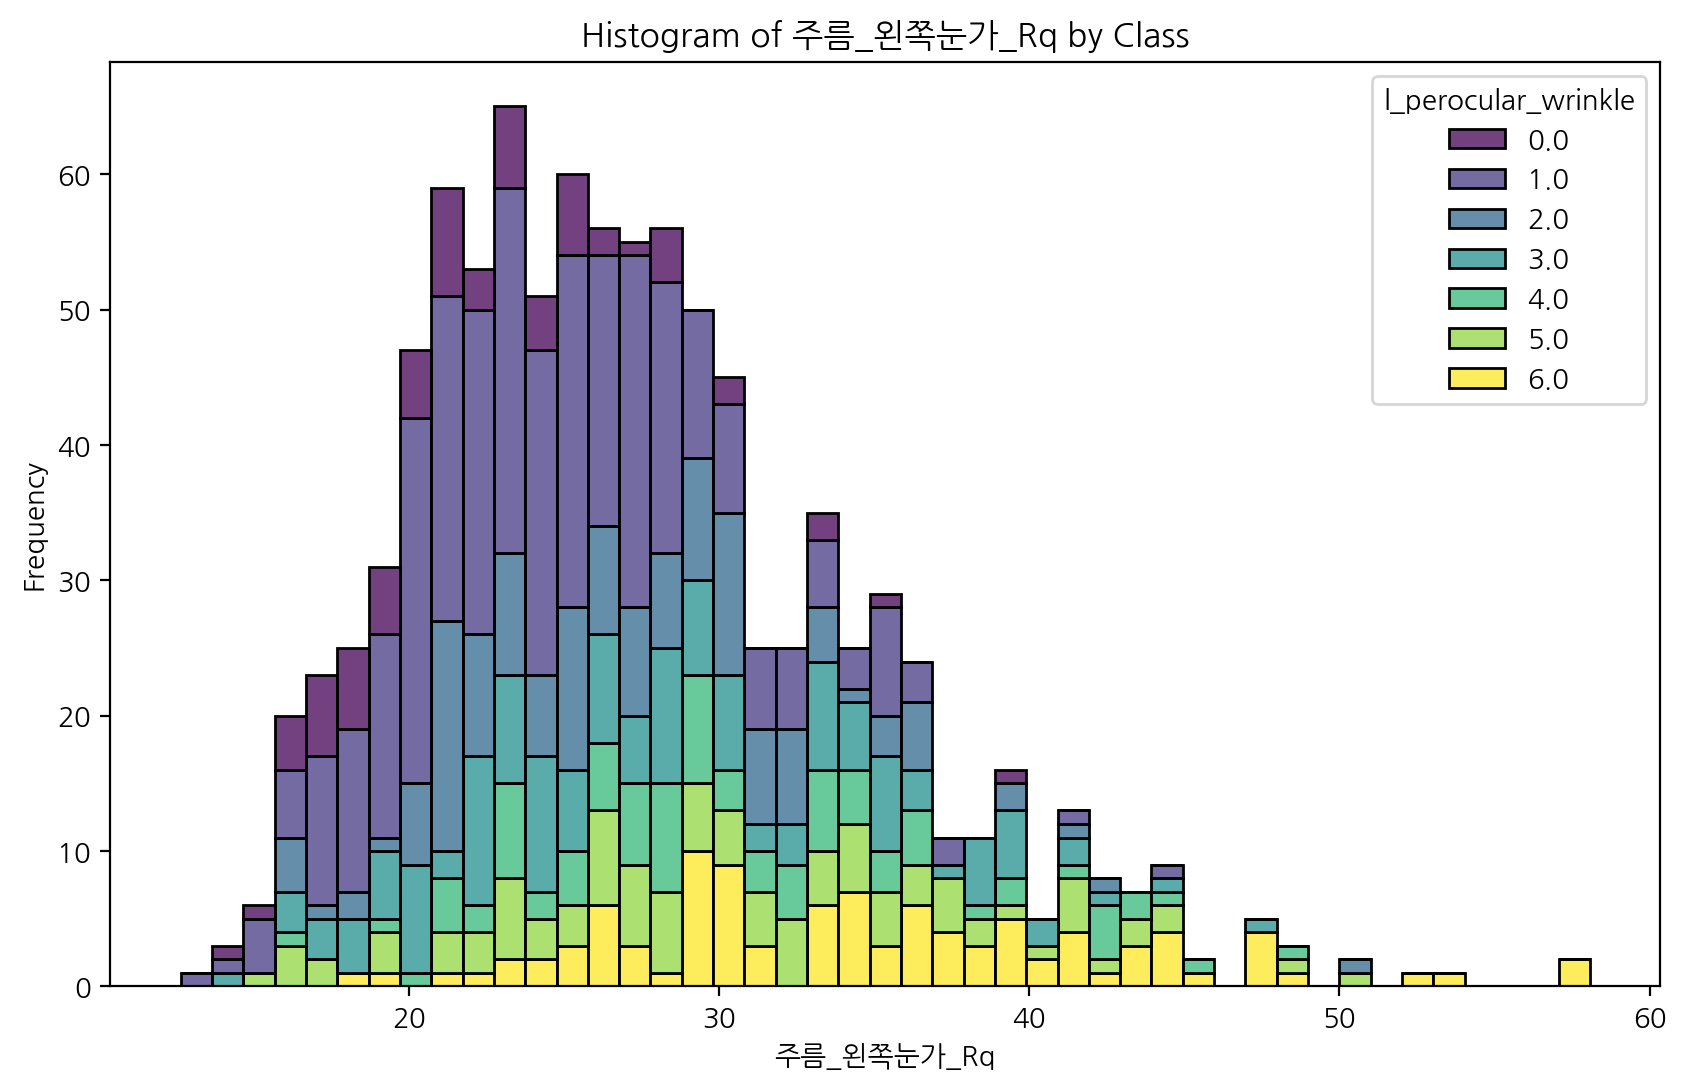

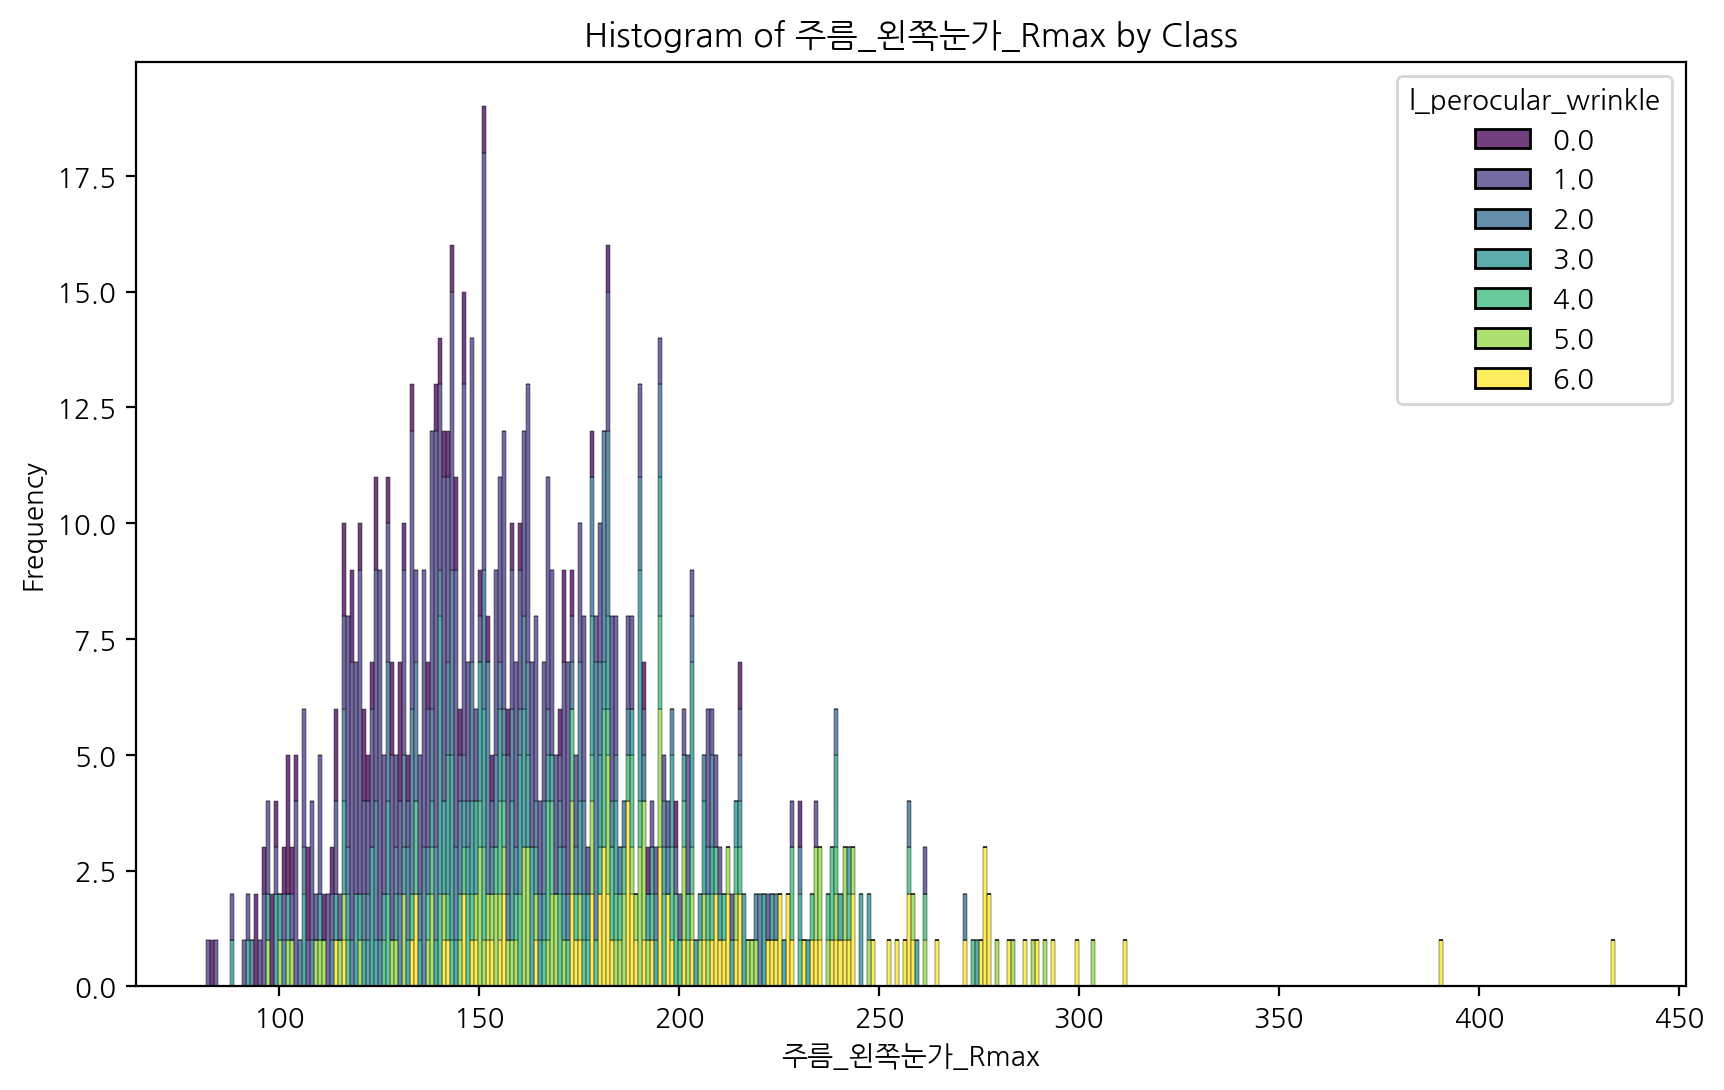

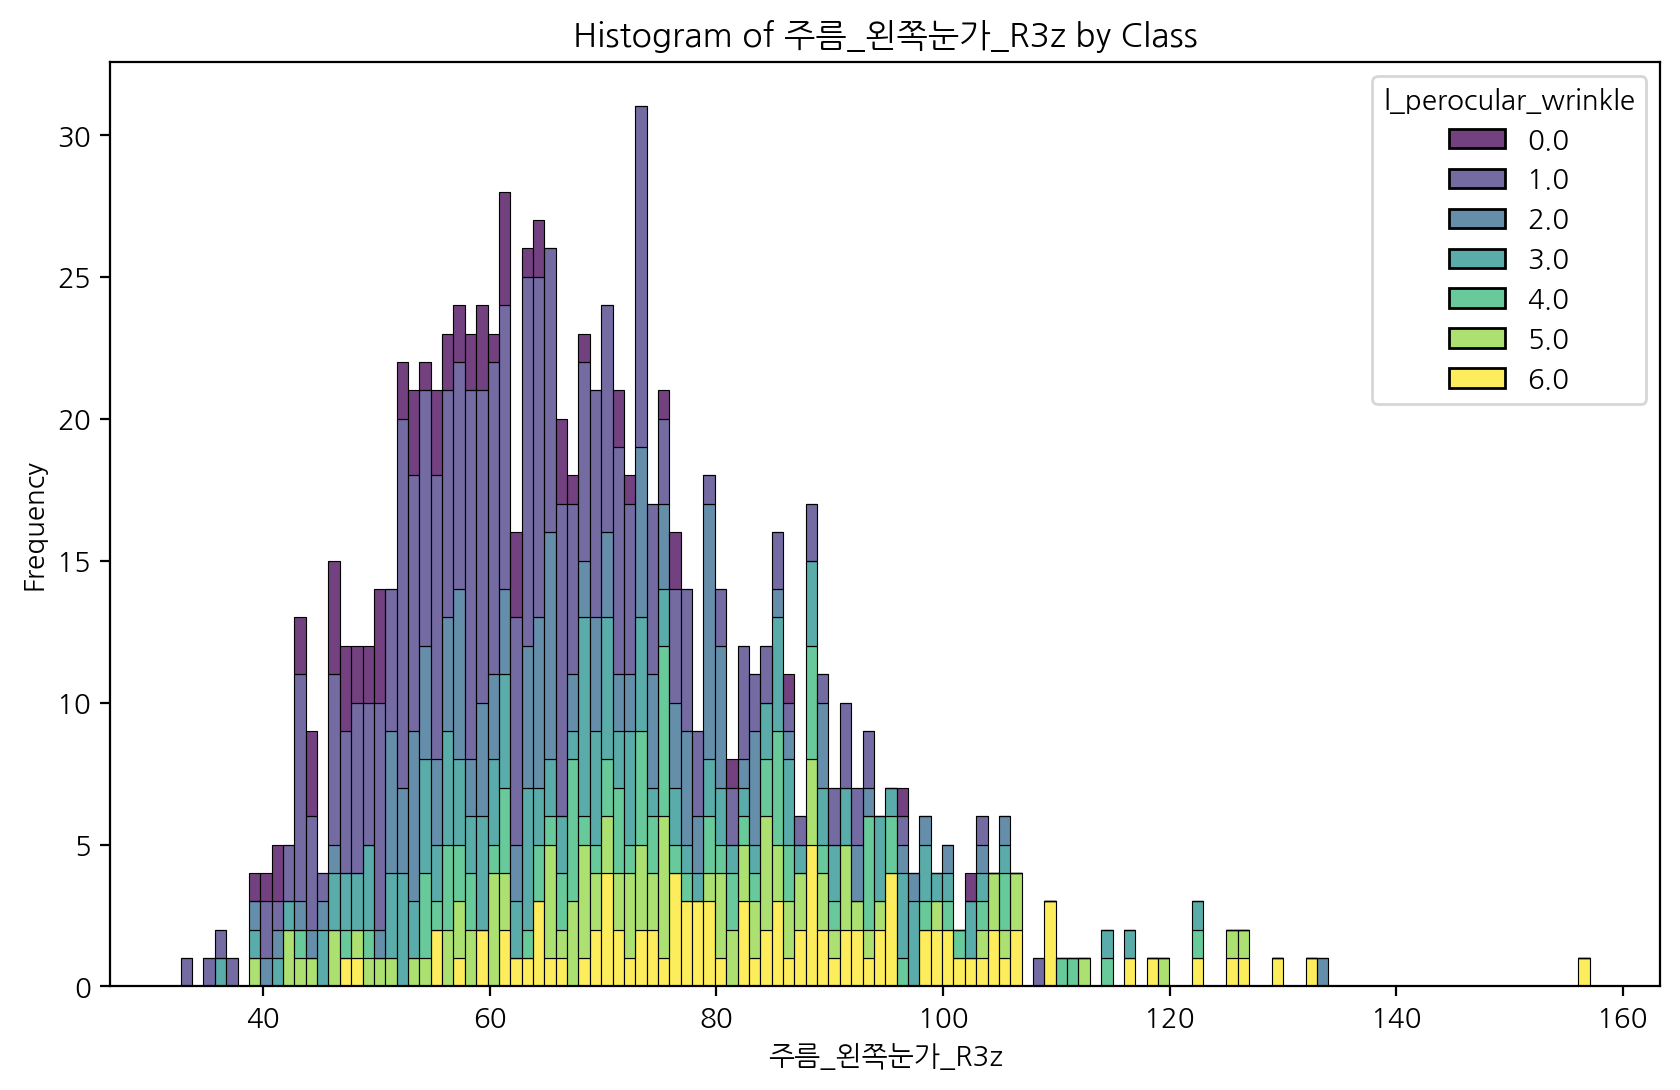

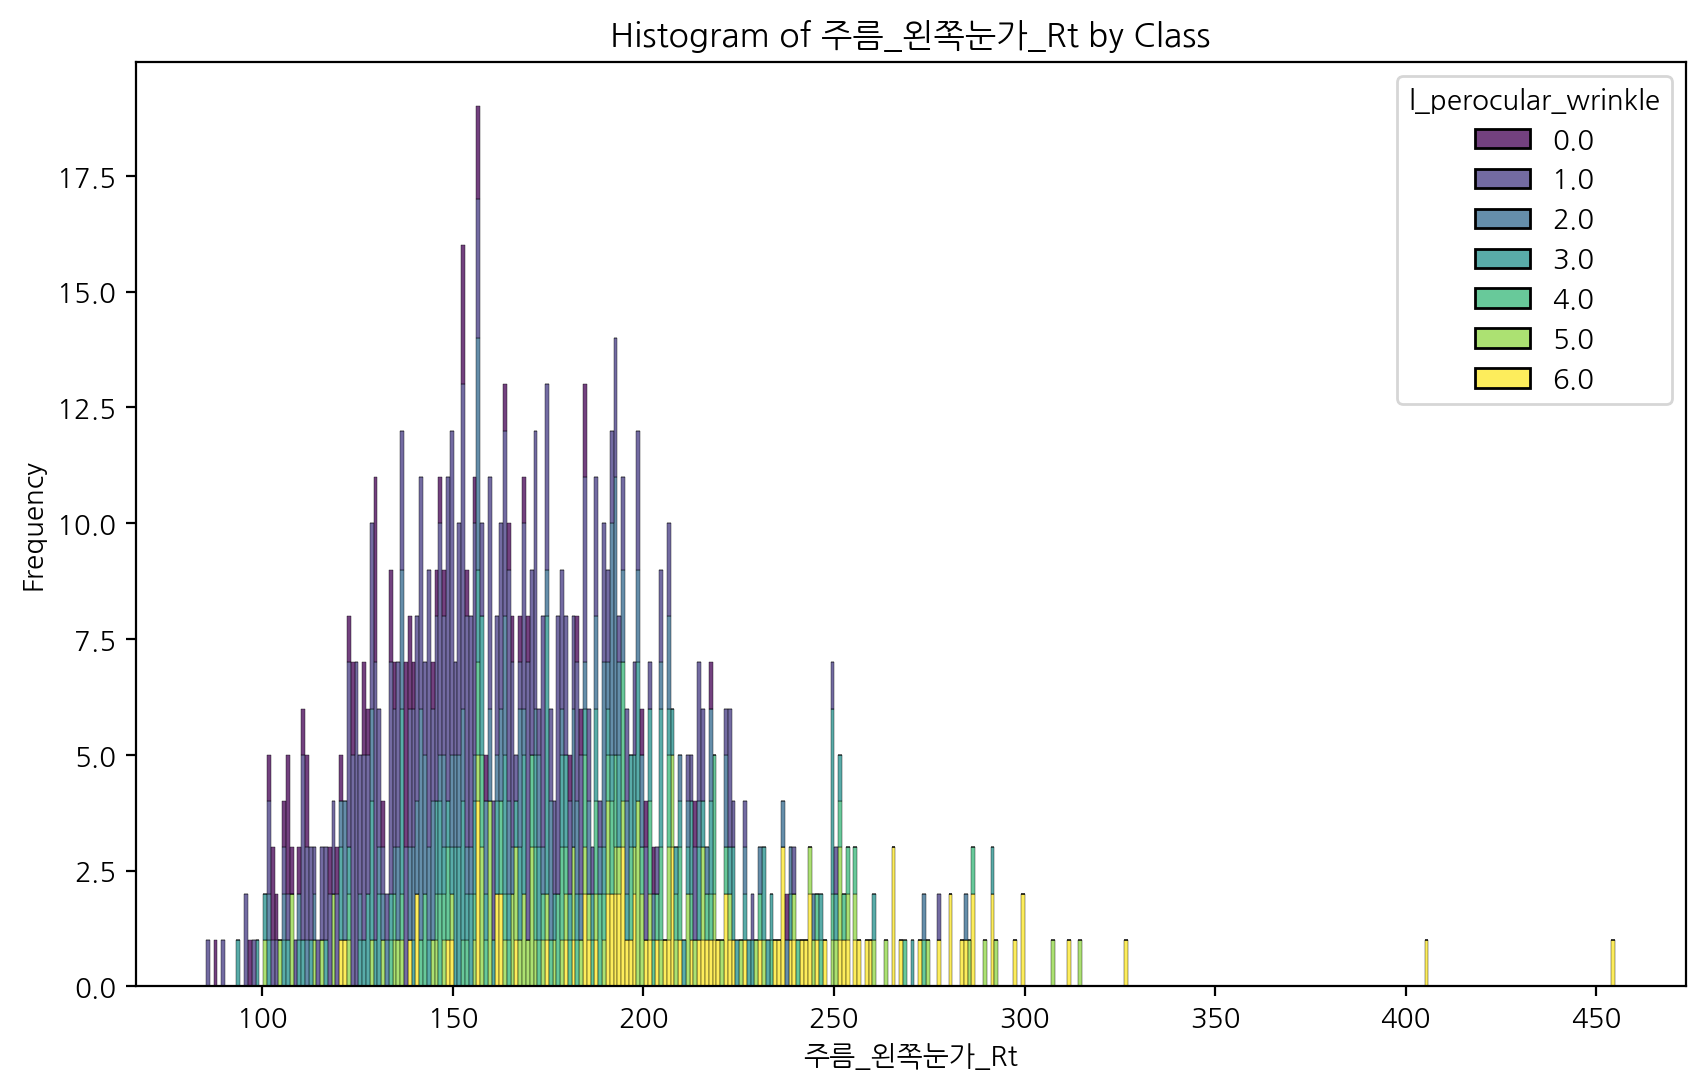

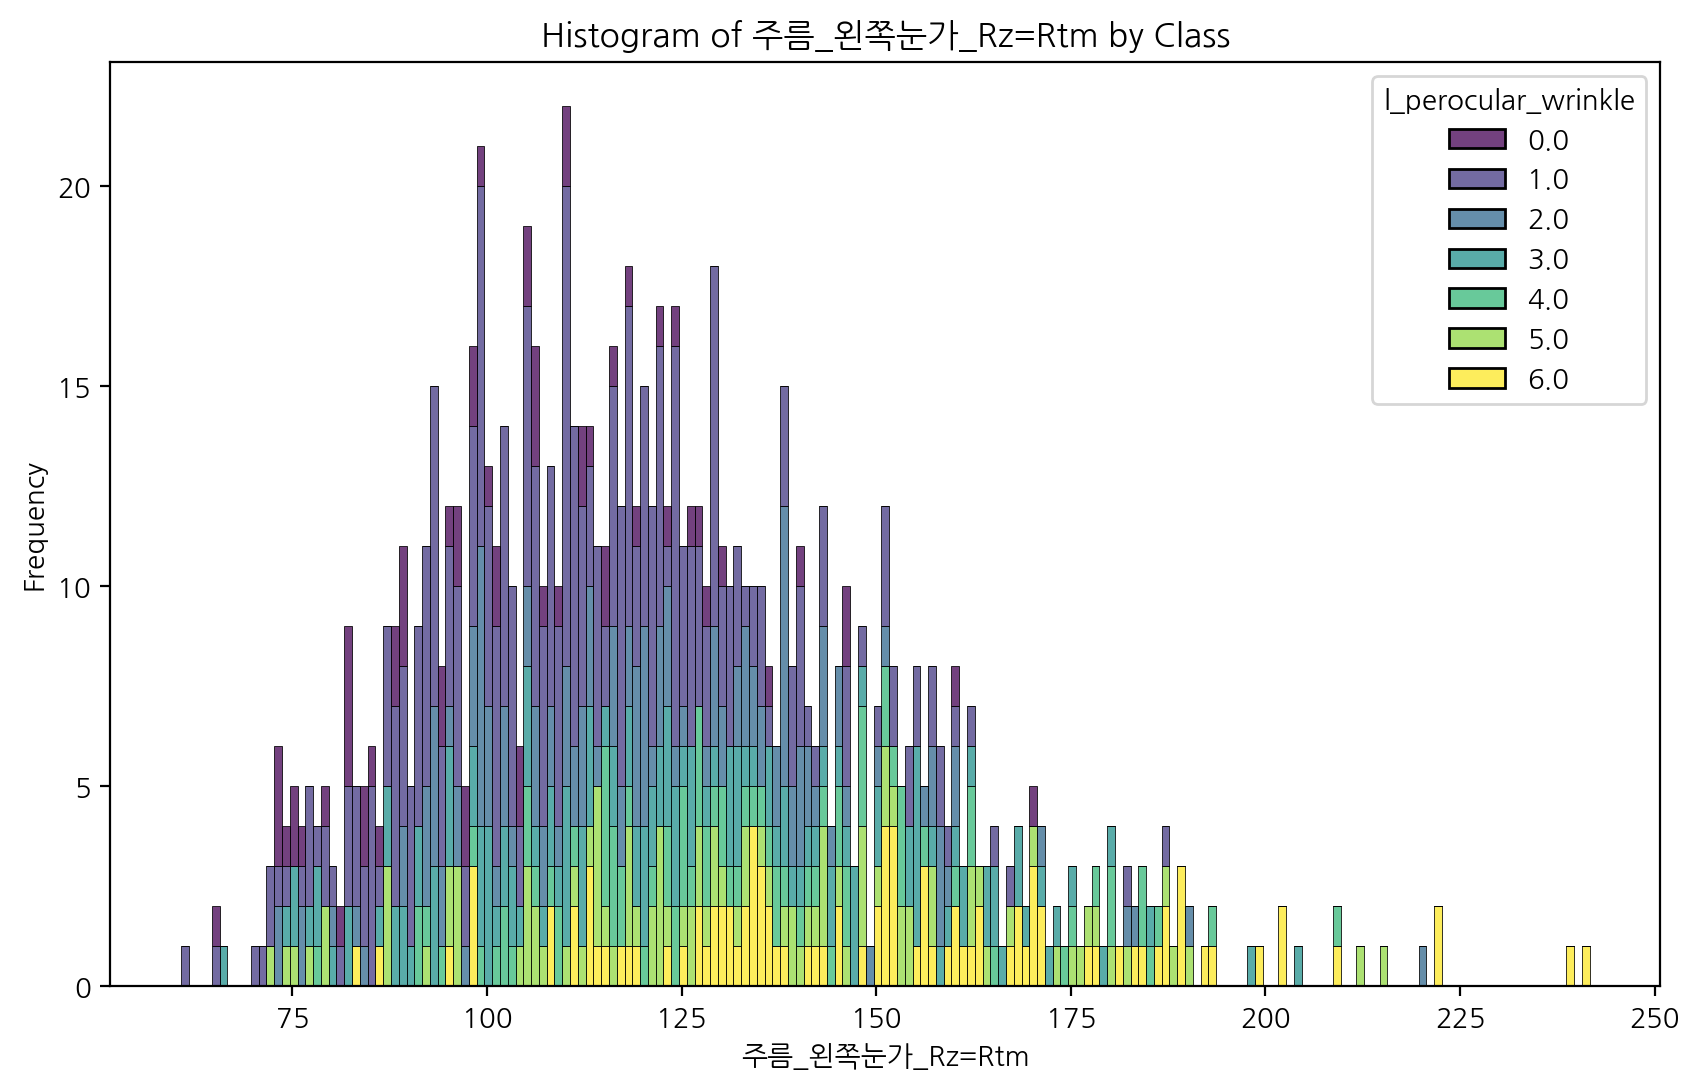

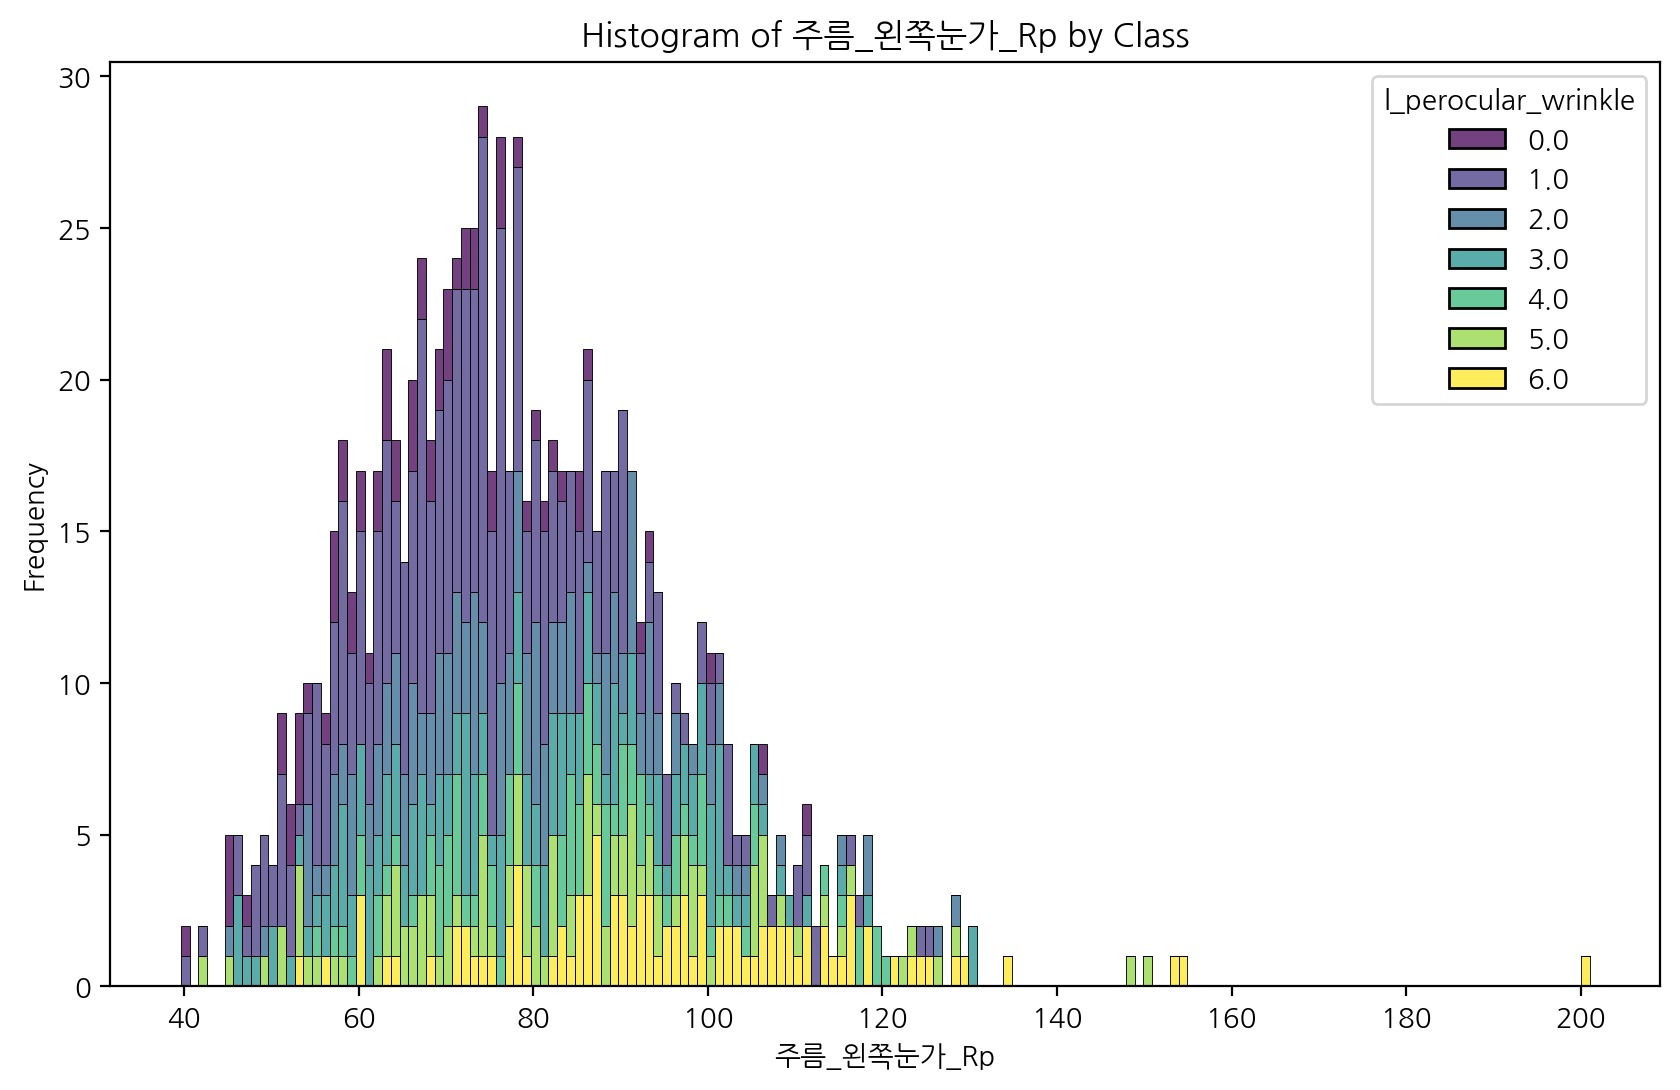

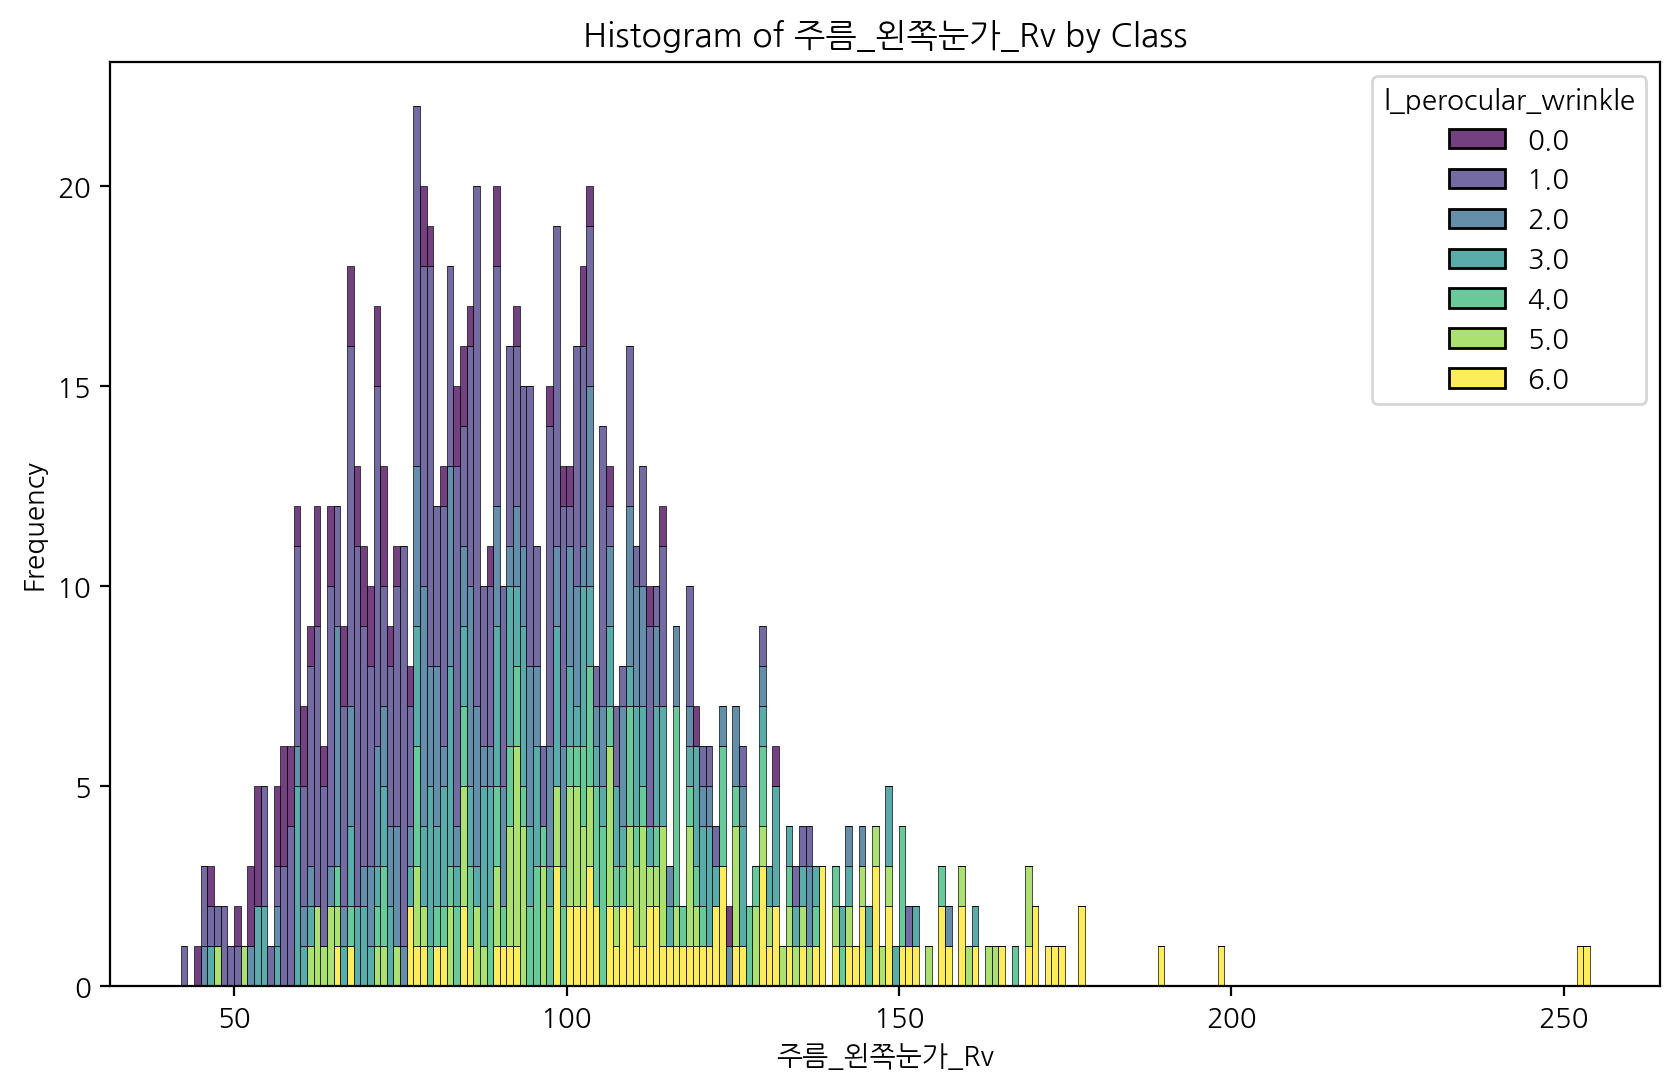

In [84]:
# 수치 데이터 컬럼과 히스토그램을 그릴 수치 데이터를 정의
numeric_columns = l_perocular_wrinkle.columns[2:]

# 색상과 레이블을 포함한 히스토그램 그리기
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=l_perocular_wrinkle.iloc[:, 1:], x=col, hue='l_perocular_wrinkle', multiple='stack', palette='viridis', binwidth=1, legend=True)
    plt.title(f'Histogram of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 턱 쳐짐 / 탄력_턱

In [82]:
chin_sagging = annotation_avg[['ID', 'chin_sagging']].merge(extract_columns_by_keyword(measurement, '턱'), on='ID')
print(chin_sagging.shape)
chin_sagging.head(2)

(965, 17)


,ID,chin_sagging,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
0,1,1.0,78.67,0.204,0.083,0.5931,0.243,0.123,0.6306,0.8378,0.3431,0.121,0.039,40.8,0.5294,0.4281,0.1013
1,2,0.0,66.00,0.279,0.088,0.6846,0.322,0.152,0.5657,0.5943,0.3548,0.191,0.043,55.8,0.6059,0.4571,0.1488


In [83]:
chin_sagging.describe()

,ID,chin_sagging,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,553.368912,1.235233,61.177212,0.233590,0.094364,0.582101,0.268865,0.136379,0.562002,0.654609,0.343097,0.139475,0.035587,46.652228,0.520722,0.417243,0.103718
std,317.429021,1.459552,10.901480,0.060118,0.024843,0.106918,0.061073,0.029477,0.104558,0.193324,0.068936,0.055275,0.008329,12.027700,0.096859,0.076777,0.031210
min,1.000000,0.000000,20.330000,0.100000,0.030000,0.220000,0.130000,0.000000,0.260000,0.280000,0.120000,0.040000,0.000000,19.000000,0.200000,0.170000,0.020000
25%,281.000000,0.000000,54.000000,0.190000,0.080000,0.510000,0.227000,0.119000,0.490000,0.510000,0.300000,0.100000,0.030000,38.200000,0.460000,0.370000,0.080000
50%,559.000000,1.000000,62.330000,0.230000,0.090000,0.580000,0.260000,0.131000,0.550300,0.640000,0.340000,0.130000,0.035000,45.600000,0.520000,0.416400,0.100000
75%,826.000000,2.000000,68.330000,0.270000,0.110000,0.650000,0.302000,0.156000,0.630000,0.770000,0.384200,0.170000,0.040000,53.400000,0.587300,0.464400,0.120000
max,1100.000000,6.000000,94.670000,0.498000,0.229000,0.890000,0.543000,0.270000,0.950000,1.420000,0.579900,0.365000,0.074000,99.600000,0.811400,0.674900,0.238600


* 수분_턱 : 0-100
* 탄력_턱_R6 : 0-2
* 탄력_턱_Q0 : 0-100

In [85]:
chin_sagging.iloc[:, 1:].corr()

,chin_sagging,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
chin_sagging,1.000000,-0.004459,-0.330133,0.034801,-0.329521,-0.320542,0.025821,-0.086300,0.362233,-0.298596,-0.370024,0.009374,-0.327036,-0.335745,-0.326054,-0.237661
수분_턱,-0.004459,1.000000,-0.104822,-0.088050,-0.009982,-0.094145,-0.059868,0.080103,0.017747,0.056365,-0.071183,0.062419,-0.102841,-0.000671,0.035713,-0.081726
탄력_턱_R0,-0.330133,-0.104822,1.000000,0.384022,0.530689,0.990245,0.382274,-0.110476,-0.741138,0.365090,0.910254,0.056263,0.999243,0.524464,0.416208,0.598379
탄력_턱_R1,0.034801,-0.088050,0.384022,1.000000,-0.538060,0.404608,0.903394,-0.733523,-0.120336,-0.596832,-0.026598,0.217000,0.383109,-0.539074,-0.591328,-0.219527
탄력_턱_R2,-0.329521,-0.009982,0.530689,-0.538060,1.000000,0.499986,-0.466780,0.591864,-0.578567,0.884999,0.816098,-0.183519,0.532210,0.987835,0.925099,0.786718
탄력_턱_R3,-0.320542,-0.094145,0.990245,0.404608,0.499986,1.000000,0.419064,-0.105721,-0.699689,0.346389,0.891953,0.179069,0.990934,0.497231,0.395015,0.566515
탄력_턱_R4,0.025821,-0.059868,0.382274,0.903394,-0.466780,0.419064,1.000000,-0.652226,-0.105357,-0.530594,0.009786,0.337638,0.381261,-0.466555,-0.523268,-0.161878
탄력_턱_R5,-0.086300,0.080103,-0.110476,-0.733523,0.591864,-0.105721,-0.652226,1.000000,0.169218,0.802727,0.208071,0.001709,-0.109743,0.640323,0.756903,0.121582
탄력_턱_R6,0.362233,0.017747,-0.741138,-0.120336,-0.578567,-0.699689,-0.105357,0.169218,1.000000,-0.435308,-0.749581,0.212297,-0.740905,-0.569699,-0.480496,-0.586849
탄력_턱_R7,-0.298596,0.056365,0.365090,-0.596832,0.884999,0.346389,-0.530594,0.802727,-0.435308,1.000000,0.662475,-0.112106,0.365819,0.926461,0.984566,0.450488


In [87]:
chin_sagging.iloc[:, 1:].groupby('chin_sagging').mean()

,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
chin_sagging,,,,,,,,,,,,,,,
0.0,61.003205,0.258895,0.094943,0.620246,0.293816,0.136791,0.568880,0.572126,0.365510,0.163930,0.035352,51.677727,0.556059,0.443988,0.112274
1.0,61.327969,0.220802,0.092427,0.569879,0.256177,0.135151,0.560882,0.681356,0.335983,0.128479,0.035896,44.086458,0.509127,0.409824,0.099563
2.0,61.375635,0.205079,0.091286,0.547275,0.240992,0.132794,0.557642,0.747713,0.320344,0.114825,0.035992,41.000000,0.488648,0.391394,0.097571
3.0,62.700339,0.211144,0.095983,0.541835,0.246754,0.138754,0.563105,0.748929,0.321381,0.115500,0.036034,42.201695,0.483264,0.389029,0.093817
4.0,59.346346,0.199808,0.091538,0.536227,0.235269,0.133788,0.555273,0.750408,0.318840,0.109038,0.033923,40.011538,0.477910,0.386308,0.093525
5.0,59.351389,0.211972,0.105056,0.503772,0.247333,0.143528,0.509775,0.745414,0.295814,0.107472,0.036194,42.350000,0.450625,0.360808,0.089817
6.0,65.000000,0.330000,0.170000,0.490000,0.370000,0.240000,0.400000,0.700000,0.240000,0.160000,0.040000,65.600000,0.410000,0.300000,0.110000


### 이마 주름 / 탄력_이마


### 모공 / 개수
* l_cheek_pore, r_cheek_pore

### Front

In [ ]:
## front
annotation_F.head(2)

,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
0,2,F,NaN,0.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0
3,3,F,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0


In [ ]:
annotation_F.describe()

,ID,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
count,950.000000,0.0,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,561.522105,NaN,1.231579,2.021053,2.325263,2.249474,2.588421,2.009474,1.674737,2.030526,1.196842,2.249474,2.589474
std,313.158018,NaN,1.465103,0.820945,1.197334,1.500219,1.839753,0.821802,1.587123,0.715709,0.907869,1.179324,1.846563
min,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,295.250000,NaN,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,567.500000,NaN,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,829.750000,NaN,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000
max,1100.000000,NaN,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000


In [ ]:
## front와 measurement를 합체
front_info = annotation_F.merge(measurement, left_on='ID', right_on='subject_no')
front_info.drop(columns=['location', 'acne', ])

,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,2,F,NaN,0.0,2.0,3.0,1.0,3.0,2.0,1.0,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631
1,3,F,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,19.352,111.210,51.799,116.000,89.042,60.206,55.790,32,417,312
2,6,F,NaN,1.0,2.0,3.0,3.0,3.0,2.0,2.0,...,20.146,116.920,52.665,122.920,89.886,65.894,57.030,90,301,382
3,7,F,NaN,2.0,1.0,2.0,3.0,2.0,2.0,1.0,...,21.543,129.210,57.641,137.680,96.472,68.609,69.071,112,441,434
4,8,F,NaN,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,21.892,126.940,58.471,136.050,99.272,70.962,65.092,112,629,656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1096,F,NaN,0.0,2.0,2.0,1.0,1.0,2.0,1.0,...,19.705,112.850,53.084,122.250,90.004,65.785,56.462,83,429,332
946,1097,F,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,18.712,108.010,49.645,113.130,85.129,58.063,55.070,47,220,187
947,1098,F,NaN,0.0,2.0,1.0,1.0,1.0,2.0,1.0,...,18.923,113.430,49.708,121.550,86.879,63.072,58.479,66,678,616
948,1099,F,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,14.944,88.471,38.577,92.291,69.619,42.062,50.229,44,365,271
